In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import torch

In [2]:
#Dataset/target_image.jpeg
#target_img = input("please give the path of target image")

target_img=cv2.imread('Dataset/target_image.jpeg')
#target_img=cv2.imread(target_img)
print(target_img.shape)

print(type(target_img))

(428, 760, 3)
<class 'numpy.ndarray'>


In [24]:
#patch_path = input("please give the path of patch image")

patch_img=cv2.imread('Dataset/patch1.PNG')
#patch_img=cv2.imread(patch_path)
print(patch_img.shape)

(42, 53, 3)


In [25]:
x_range = abs(patch_img.shape[1] - target_img.shape[1])
x_range 

707

In [26]:
y_range = abs(patch_img.shape[0] - target_img.shape[0])
y_range

386

In [27]:
def L2(patch, img):
    d = np.sum((patch-img)**2)
    return np.sqrt(d)


In [28]:
def L1(patch, img):
    d = np.sum(abs(patch-img))
    return np.sqrt(d)

In [29]:
def cross_corelation(patch, img):
    nominator = np.sum((patch * img))
    a = np.sqrt(np.sum(patch**2))
    b = np.sqrt(np.sum(img**2))
    denominator = a * b
    return nominator / denominator

def corelation(patch, img):
    n = np.sum((patch * img))

    return n

In [30]:
def n_cross_corelation(patch, img):
    patch_avg = np.average(patch)
    img_avg = np.average(img)
    
    normalized_patch = patch - patch_avg
    normalized_img = img - img_avg
    
    nominator = np.sum(normalized_patch * normalized_img)
    #d = np.sqrt(np.sum((patch - patch_avg)**2)) * np.sqrt(np.sum((img - img_avg)**2))
    d1 = np.sqrt(np.sum((patch - patch_avg)**2))
    d2 = np.sqrt(np.sum((img - img_avg)**2))
    d = d1*d2
    return nominator / d

In [31]:
def main(x_range, y_range, target_img, patch_img, mode):

    score = []
    d = {}

    if mode == 'c_correlation':
        for j in range(y_range+1):
            for i in range(x_range+1):
                start_list = []
                end_list = []
                #print(image[j:template.shape[0]+j, i:template.shape[1]+i])
                a = cross_corelation(patch_img, target_img[j:patch_img.shape[0]+j, i:patch_img.shape[1]+i])
                score.append(a)

                start_list.append(i)
                start_list.append(j) 
                end_list.append((patch_img.shape[1]+i)-1)
                end_list.append((patch_img.shape[0]+j)-1)
                #print(tuple(start_list))
                #print(tuple(end_list))
                s = tuple(start_list)
                e = tuple(end_list)

                d[s,e] = a

        #print(max(d, key=d.get))
        #print(min(d.values()))

        return max(d, key=d.get), max(d.values()), min(d, key=d.get), min(d.values()), score

    if mode == 'correlation':
        for j in range(y_range+1):
            for i in range(x_range+1):
                start_list = []
                end_list = []
                #print(image[j:template.shape[0]+j, i:template.shape[1]+i])
                a = corelation(patch_img, target_img[j:patch_img.shape[0]+j, i:patch_img.shape[1]+i])
                score.append(a)

                start_list.append(i)
                start_list.append(j) 
                end_list.append((patch_img.shape[1]+i)-1)
                end_list.append((patch_img.shape[0]+j)-1)
                #print(tuple(start_list))
                #print(tuple(end_list))
                s = tuple(start_list)
                e = tuple(end_list)

                d[s,e] = a

        #print(max(d, key=d.get))
        #print(min(d.values()))

        return max(d, key=d.get), max(d.values()), min(d, key=d.get), min(d.values()), score

    if mode == 'l1':
        for j in range(y_range+1):
            for i in range(x_range+1):
                start_list = []
                end_list = []
                #print(image[j:template.shape[0]+j, i:template.shape[1]+i])
                a = L1(patch_img, target_img[j:patch_img.shape[0]+j, i:patch_img.shape[1]+i])
                score.append(a)

                start_list.append(i)
                start_list.append(j) 
                end_list.append((patch_img.shape[1]+i)-1)
                end_list.append((patch_img.shape[0]+j)-1)
                #print(tuple(start_list))
                #print(tuple(end_list))
                s = tuple(start_list)
                e = tuple(end_list)

                d[s,e] = a

        #print(max(d, key=d.get))
        #print(min(d.values()))

        return max(d, key=d.get), max(d.values()), min(d, key=d.get), min(d.values()), score



    if mode == 'l2':
        for j in range(y_range+1):
            for i in range(x_range+1):
                start_list = []
                end_list = []
                #print(image[j:template.shape[0]+j, i:template.shape[1]+i])
                a = L2(patch_img, target_img[j:patch_img.shape[0]+j, i:patch_img.shape[1]+i])
                score.append(a)

                start_list.append(i)
                start_list.append(j) 
                end_list.append((patch_img.shape[1]+i)-1)
                end_list.append((patch_img.shape[0]+j)-1)
                #print(tuple(start_list))
                #print(tuple(end_list))
                s = tuple(start_list)
                e = tuple(end_list)

                d[s,e] = a

        #print(max(d, key=d.get))
        #print(min(d.values()))

        return max(d, key=d.get), max(d.values()), min(d, key=d.get), min(d.values()), score

In [32]:
#calling the main function

#max_coordinate, max_value, min_coordinate, min_value, score_list = main(x_range, y_range, target_img, patch_img, 'c_correlation')
#max_coordinate, max_value, min_coordinate, min_value, score_list = main(x_range, y_range, target_img, patch_img, 'correlation')
#max_coordinate, max_value, min_coordinate, min_value, score_list = main(x_range, y_range, target_img, patch_img, 'l1')
max_coordinate, max_value, min_coordinate, min_value, score_list = main(x_range, y_range, target_img, patch_img, 'l2')

In [33]:
print('maximum value ',max_value)
print('minimum value ',min_value)

print(min_coordinate[0])

maximum value  882.4148684150783
minimum value  58.283788483591216
(37, 24)


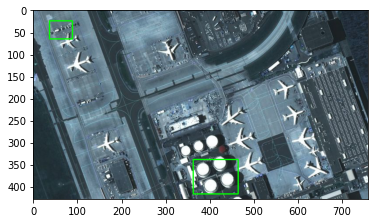

In [34]:
def localize(coordinate):
    im = cv2.rectangle(target_img, coordinate[0],coordinate[1], (0,255,0), 2)
    plt.imshow(im)
    plt.show()

localize(min_coordinate)

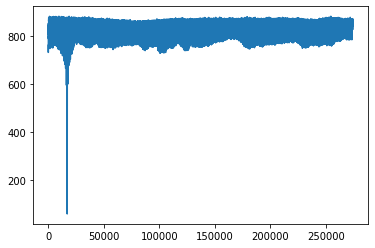

In [35]:
z = range(len(score_list))

plt.plot(z, score_list)